# Numpy Review

The [Numpy](https://www.numpy.org/) package provides *ndarray* objects
(vectors, matrices, tensors) along with fast numerical operations (sum,
mul, max, etc). It works a bit like Matlab. **Getting good at Numpy is
worth your time.**

This document contains short Numpy code examples. It was written
specifically for this course. You need to understand these examples to
have reasonable competence at numerical computing in Python. All machine
learning packages (e.g., scikit-learn, TensorFlow, PyTorch, JAX) either
rely on Numpy or offer their own Numpy-like functionality that is
interchangeable with Numpy.

## Importing Numpy

If you need to use Numpy, use the following line:




In [ ]:
import numpy as np

## Ndarray objects

Numpy provides the
[ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)
type, which stands for "N-dimensional array." The simplest is
one-dimensional:



In [ ]:
y = [2, 4, 6]        # Create a list object with three slots, each refering to an integer object
x = np.array(y)      # Create an ndarray object, initializing each x[i] by copying the value from y[i]
print(x)

[2 4 6]


We can check the type of this new object:

In [ ]:
print(type(x))             # Variable 'x' refers to an object of type 'ndarray' defined by the numpy module

<class 'numpy.ndarray'>


An ndarray object has attributes that tell us about its dimensions and
its data type:



In [ ]:
print(x.ndim)       # The 'ndim' (number of dimensions) on this particular ndarray object is 1
print(len(x))       # The length of the first dimension (the only dimension) is 3
print(x.shape)      # The 'shape' tuple contains the length of each dimension (all 'ndim' of them)
print(x.dtype)      # The 'dtype' (data type) on this particular ndarray object is 32-bit integer

1
3
(3,)
int64


The array data is now separate from the list we initialize it with:



In [ ]:
x[0] = -1         # Replace the value in slot x[0] with the value of an integer object
print(x)
print(y)

[-1  4  6]
[2, 4, 6]


You can create a two-dimensional (2D) ndarray object from nested lists:



In [ ]:
x = np.array([[2, 4, 6], [5, 3, 1]])   # Create a nested list (3 list objects, 6 integers) and

print(x)                                     # use it to initialize a new ndarray object
print(x.ndim)          # The 'ndim' (number of dimensions) of this ndarray object is 2
print(x.shape)

[[2 4 6]
 [5 3 1]]
2
(2, 3)


**Each dimension is called an *axis*** because we can do operations on
separate axes:




In [ ]:
print(x.sum())         # Sum all 6 values in the 2x3 ndarray and return an object
print(x.sum(axis=0))   # Sum across the first axis (outer-most axis), giving new ndarray [2+5, 4+3, 6+1]
print(x.sum(axis=1))   # Sum across the second axis (inner axis), giving new ndarray [2+4+6, 5+3+1]

21
[7 7 7]
[12  9]


Ndarrays are *mutable*, which means you can modify the data inside
arrays without creating a new object or a new copy of the data. This is
true even if you use Python operators like `+=` and `-=`:



In [ ]:
x = np.array([0, 0, 0])
y = x
x += 5
print(y)


[5 5 5]


This is unlike Python integer or float objects, which are *immutable*
and work differently:



In [ ]:
x = 0
y = x
x += 5
print(y)

0


## Ndarray versus list representations

The main reason you should use arrays is because they make numerical
computing much easier than with Python lists. A second reason is that
arrays can be faster and more memory efficient than lists. Why is that?

Consider again the code:



In [ ]:
y = [2, 4, 6]        # Create a list object with three slots, each refering to an integer object
x = np.array(y)      # Create an ndarray object, initializing each x[i] by copying the value from y[i]

Here is a diagram of the memory allocations that Python makes when you
run the above code:

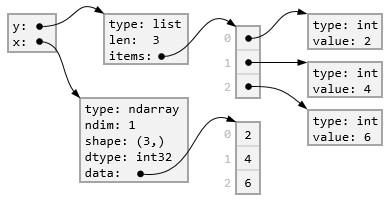<span class="image"></span>

Even the above diagram is heavily simplified, but it gives the right
idea. Arrows show references to chunks of memory. Compare the list
versus the array representations above.

-   **List representation.** Variable *y* refers to a chunk of memory
    for a list object. The list object refers to a chunk of memory big
    enough to hold 3 reference slots. (This chunk would grow if we added
    items to the list.) Each slot refers to an object. Here, each is a
    separate integer object holding a distinct value.
-   **Array representation.** Variable *x* refers to a chunk of memory
    for an ndarray object. The ndarray object refers to a chunk of
    memory big enough to hold 3 consecutive data values, here 32-bit
    integers (int32).

The biggest difference is that *arrays assume that data is all of the
same type.* Lists and tuples do not make this assumption, so they cannot
be as efficient.

To see what this difference means, imagine the same example but with
more data:



In [ ]:
y = list(range(1000))
x = np.array(y)

In terms of memory usage, the list would use at least **32064 bytes**
(96x1 list object + 8x1000 slots + 24x1000 int objects) and the array
would use **4096 bytes** (96x1 ndarray object + 4x1000 int32 values).
That's nearly an 8x difference in memory usage. Contiguous data also
allows faster computation via [SIMD
instructions](https://en.wikipedia.org/wiki/Streaming_SIMD_Extensions).

## Creating ndarrays

You should know the [standard array creation
functions](https://www.numpy.org/devdocs/reference/routines.array-creation.html):

-   **np.[array](https://www.numpy.org/devdocs/reference/generated/numpy.array.html)**
    creates an ndarray with values initialized from a list (or a list of
    lists, etc)
-   **np.[zeros](https://www.numpy.org/devdocs/reference/generated/numpy.zeros.html)** creates an ndarray with values initialized to $0$
-   **np.[ones](https://www.numpy.org/devdocs/reference/generated/numpy.ones.html)**
    creates an ndarray with values initialized to $1$
-   **np.[full](https://www.numpy.org/devdocs/reference/generated/numpy.full.html)**
    creates an ndarray with values initialized to a value that you
    specify
-   **np.[empty](https://www.numpy.org/devdocs/reference/generated/numpy.empty.html)**
    creates an ndarray with values left uninitialized (risky!)
-   **np.[eye](https://www.numpy.org/devdocs/reference/generated/numpy.eye.html)**
    creates an ndarray with values initialized to be the identity matrix
-   **np.[arange](https://www.numpy.org/devdocs/reference/generated/numpy.arange.html)**    creates an ndarray with values initialized to $0,1,2,\ldots$, similar to Python's
    *range* function
-   **np.[linspace](https://www.numpy.org/devdocs/reference/generated/numpy.linspace.html)**
    creates an ndarray with float values equally spaced within a range
    (useful for plotting)

Some examples:



In [ ]:
print(np.zeros(3))             # Create an ndarray object with shape (3,) and fill it with 0.0
print(np.ones(3))              # Create an ndarray object with shape (3,) and fill it with 1.0
print(np.full((2, 3), 5))      # Create an ndarray object with shape (2, 3) and fill it with integer 5
print(np.eye(3))               # Create an ndarray object with shape (3, 3) and fill the diagonal with 1.0
print(np.arange(3))            # Create an ndarray object with shape (3,) and fill it with ascending integers
print(np.linspace(0, 0.5, 6))  # Create an ndarray object with shape (11,) and fill it with values that

[0. 0. 0.]
[1. 1. 1.]
[[5 5 5]
 [5 5 5]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[0 1 2]
[0.  0.1 0.2 0.3 0.4 0.5]


## Data types

Each ndarray object has a specific
[dtype](https://www.numpy.org/devdocs/user/basics.types.html) (data
type). For machine learning, you should know the basic types:

-   **np.bool\_** is an 8-bit boolean (False or True); the extra `_` is
    to avoid name clash with the Python `bool`.
-   **np.int8** is an 8-bit signed integer (-127..128)
-   **np.int16** is a 16-bit signed integer
-   **np.int32** is a 32-bit signed integer
-   **np.int64** is a 64-bit signed integer
-   **np.uint8** is an 8-bit unsigned integer (0..255)
-   **np.uint16** is a 16-bit unsigned integer
-   **np.uint32** is a 32-bit unsigned integer
-   **np.uint64** is a 64-bit unsigned integer
-   **np.float16** is a 16-bit IEEE floating point number ("half
    precision")
-   **np.float32** is a 32-bit IEEE floating point number
-   **np.float64** is a 64-bit IEEE floating point number ("double
    precision")

You should of course know what all these data types are in a general
computing sense (signed vs unsigned, int vs float, 32 vs 64 bit) and be
able to choose an appropriate data type in a given situation.

Numpy tries to guess which dtype you want, based on the values you use
to initialize it:



In [ ]:
print(np.array([1, 2, 3]))      # Create an int32 ndarray object, since all values are integers
print(np.array([1, 2, 3.]))     # Create a float64 ndarray object, since at least one value is float

[1 2 3]
[1. 2. 3.]


You can always override the default dtype:




In [ ]:
print(np.ones(3))
print(np.ones(3, dtype=np.float32))

[1. 1. 1.]
[1. 1. 1.]


Numpy also tries to guess the desired dtype when doing a numerical
operation:


In [ ]:
x = np.array([1, 2, 3])  # Create an int32 ndarray
y = x + 0.5              # Create a new ndarray with entries x[i] + 0.5 (int32 + float results in float)
print(y)                 # Numpy guesses that we want dtype float64 for this new ndarray         

[1.5 2.5 3.5]


## Basic indexing and slicing

Numpy [indexing and
slicing](https://www.numpy.org/devdocs/user/quickstart.html#indexing-slicing-and-iterating)
both work similarly to lists:



In [ ]:
x = np.array([2, 4, 6])  # Create an int32 ndarray, initialized from three integer objects
print(x[0])                     # Index [0] has the int32 value 2
print(x[-1])                    # Index [len(x)-1] has the int32 value 6
print(x[1:])                    # Slice [1:len(x)] creates a new ndarray array skipping first item

2
6
[4 6]


You can assign an index or a slice to be a constant value:



In [ ]:
x[1:] = 0
print(x)

[2 0 0]


You can also assign a slice to be an ndarray of values. which *copies*
data from one ndarray into another:



In [ ]:
y = np.array([5, 3, 1])
x[1:] = y[:2]            # Copy the first two slots of 'y' into to the last two slots of 'x'
print(x)

[2 5 3]


You can also assign a slice to be an ndarray of values. which *copies*
data from one ndarray into another:

In [ ]:
y = np.array([5, 3, 1])
x[1:] = y[:2]            # Copy the first two slots of 'y' into to the last two slots of 'x'
print(x)

[2 5 3]


Assigning to a slice is different from assigning a variable:


In [ ]:
x[:] = 7       # Create an integer object with value 7 and copy its value into every slot
print(x)

x = 7          # Create an integer object with value 7 and make the variable 'x' refer to it
print(x)       # (We no longer refer to the ndarray object at all)

[7 7 7]
7


You can do multi-dimensional indexing:



In [ ]:
x = np.array([[2, 4, 6],   # Create a 2x3 int32 ndarray, initialized from a nested list
              [5, 3, 1]])

print(x[0,0])          # Index [0,0] has int32 value 2 (first row, first column)
print(x[0,-1])         # Index [0,m-1] has int32 value 6, where m is the number of columns
print(x[-1,0])         # Index [n-1,0] has int32 value 5, where n is the number of rows

2
6
5


You can also do multi-dimensional slicing:



In [ ]:
y = x[1:,:2]    # Create a new ndarray object by slicing subarray [1:n,0:2] from 'x'
print(y)

[[5 3]]


It is important to understand exactly what happened above. The diagram
below shows how the two ndarray objects refer to the same chunk of data:

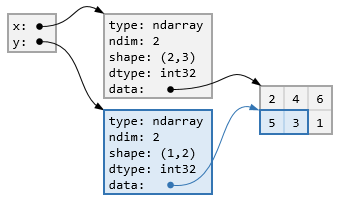<span class="image"></span>

The ndarray object referred to by *y* **is sharing the same data** as
the ndarray object referred to by *x*. The terminology for this is that
"*y* is a *view* into *x*." This is easy to demonstrate:



In [ ]:
y[0,1] = 7        # Replace the value at y[0,1] with 7 (first row, second column)
print(x)

[[2 4 6]
 [5 7 1]]


If you omit a particular dimension when indexing, Numpy returns a full
slice (`:`) of that dimension:



In [ ]:
print(x[1])              # Create an ndarray object with a view of the entire second row, like x[1,:]

[5 7 1]


Indexing with an integer *i* results in an array with reduced dimension.



In [ ]:
x = np.array([[2, 4, 6],
              [5, 3, 1]])

print(x[:,1])           # A view of the second column with shape (2,) 
print(x[0,:])           # A view of the first row with shape (3,)

[4 3]
[2 4 6]


Slicing with a length-1 range *i:i+1* retrieves the same data as using
index *i* but preserves dimension:


In [ ]:
print(x[:,1:2])         # A view of the second column with shape (2,1), an explicit column-vector
print(x[0:1,:])         # A view of the first row with shape (1,3), an explicit row-vector

[[4]
 [3]]
[[2 4 6]]


## Looping

You can iterate over the outer-most dimension of an ndarray. For a
matrix this means you loop over the rows:




In [ ]:
x = np.array([[2, 4, 6],
              [5, 3, 1]])

for xi in x:        # for i in range(len(x)):     <-- Same as doing this
     print(xi)      #     print(x[i])             <--

[2 4 6]
[5 3 1]


On the first iteration, variable *xi* refers to a new ndarray object
that has a "view" into the first row of data:

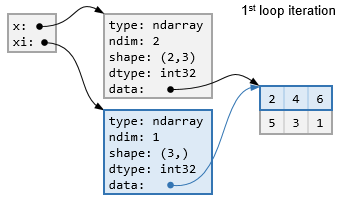<span class="image"></span>

On the second iteration, *xi* refers to a new, different ndarray object,
this time with a view into the second row:

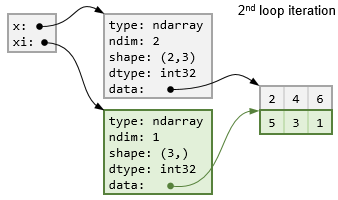<span class="image"></span>

Notice that each row is given as a 1D array, not as a 1x3 matrix. This
design allows for nested loops:



In [ ]:
for xi in x:          # for i in range(len(x)):          <-- Same as doing this
     for xij in xi:    #     for j in range(len(x[i])):   <--
         print(xij)    #         print(x[i,j])            <--

2
4
6
5
3
1


Each time the inner loop starts, variable *xij* refers to a new object
of type *numpy.int32*, and this object holds a reference to a single raw
data value. The diagram below depicts the last iteration of the above
loop:

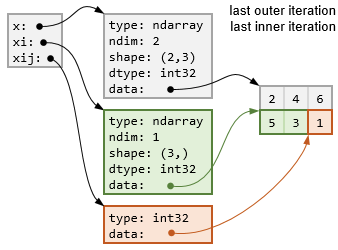<span class="image"></span>

Looping over ndarray elements is slow because it involves a lot of
object creation. You should only do it if your code still runs "fast
enough" (often the case) and .

## Indexing with integer and boolean ndarrays

You can [index with an integer
ndarray](https://www.numpy.org/devdocs/user/quickstart.html#indexing-with-arrays-of-indices):



In [ ]:
x = np.array([6, 7, 8, 9])
y = np.array([1, 3])
z = x[y]         # Create an ndarray object containing only the elements of 'x' indexed by 'y'
print(z)

[7 9]


When using an ndarray as an index, the new ndarray object is *not* a
view into the original data; it is a *copy*. The code above would result
in the memory allocations depicted below:

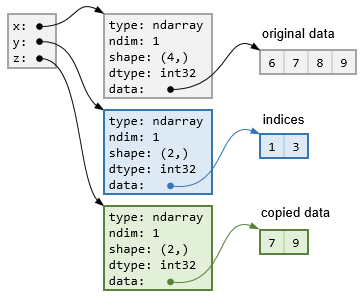<span class="image"></span>

You can also [index with a boolean
ndarray](https://www.numpy.org/devdocs/user/quickstart.html#indexing-with-boolean-arrays):



In [ ]:
y = np.array([False, True, False, True])   # Create a boolean array with 'True' in slots 1 and 3
print(x[y])

[7 9]


You can think of boolean ndarray indexing as "masking" the original
array. However, do not confuse boolean indexing with "[masked
arrays](https://www.numpy.org/devdocs/reference/routines.ma.html)" — do
not waste your time learning "masked arrays."

Both integer and boolean indexing work on multi-dimensional arrays:


In [ ]:
x = np.array([[6, 6.5],   # Create a 4x2 ndarray of float64 values
              [7, 7.5],
              [8, 8.5],
              [9, 9.5]])

y = np.array([1, 3])   # Create an ndarray of int32 indices
print(x[y])                   # Create an ndarray object containing only the rows of 'x' indexed by 'y'

y = np.array([False, True, False, True])   # Create a boolean array with 'True' in slots 1 and 3
print(x[y])

[[7.  7.5]
 [9.  9.5]]
[[7.  7.5]
 [9.  9.5]]


## Functions and operators

Numpy provides too many functions to know all at once. (You can see a
complete list
[here](https://www.numpy.org/devdocs/reference/routines.html).) You
should know about the following functions:

-   **np.[reshape](https://www.numpy.org/devdocs/reference/generated/numpy.reshape.html)**
    returns an ndarray with a view into the same data but with a
    different shape
-   **np.[ravel](https://www.numpy.org/devdocs/reference/generated/numpy.ravel.html)**
    returns an ndarray with a view into the same data but unraveled into
    a 1-dimensional vector
-   **np.[fabs](https://www.numpy.org/devdocs/reference/generated/numpy.fabs.html)**
    returns an ndarray containing the absolute values of a float ndarray
-   **np.[sum](https://www.numpy.org/devdocs/reference/generated/numpy.sum.html)**
    returns the sum over one or more axes within a single ndarray
-   **np.[mean](https://www.numpy.org/devdocs/reference/generated/numpy.mean.html)**
    returns the average over one or more axes within a single ndarray
-   **np.[min](https://www.numpy.org/devdocs/reference/generated/numpy.amin.html)**
    returns the minimum over one or more axes within a single ndarray
-   **np.[max](https://www.numpy.org/devdocs/reference/generated/numpy.amax.html)**
    returns the maximum over one or more axes within a single ndarray
-   **np.[minimum](https://www.numpy.org/devdocs/reference/generated/numpy.minimum.html)**
    returns the elementwise minimum of two equally-shaped ndarrays
-   **np.[maximum](https://www.numpy.org/devdocs/reference/generated/numpy.maximum.html)**
    returns the elementwise maximum of two equally-shaped ndarrays
-   **np.[transpose](https://www.numpy.org/devdocs/reference/generated/numpy.transpose.html)**
    returns a transposed view of a single ndarray; see
    [ndarray.T](https://www.numpy.org/devdocs/reference/generated/numpy.ndarray.T.html)
    for shorthand
-   **np.[reshape](https://www.numpy.org/devdocs/reference/generated/numpy.reshape.html)**
    returns a reshaped view of a single ndarray
-   **np.[vstack](https://www.numpy.org/devdocs/reference/generated/numpy.vstack.html)**
    returns an ndarray built by "vertically" stacking a list of
    ndarrays, like rows of a matrix
-   **np.[hstack](https://www.numpy.org/devdocs/reference/generated/numpy.hstack.html)**
    returns an ndarray built by "horizontally" stacking a list of
    ndarrays, like columns of a matrix
-   **np.[dot](https://www.numpy.org/devdocs/reference/generated/numpy.dot.html)**
    returns the dot product (inner product) of two ndarrays, typically
    two vectors
-   **np.[any](https://www.numpy.org/devdocs/reference/generated/numpy.any.html)**
    returns the logical OR over one or more axes within a single ndarray
-   **np.[all](https://www.numpy.org/devdocs/reference/generated/numpy.all.html)**
    returns the logical AND over one or more axes within a single
    ndarray
-   **np.[array_equal](https://www.numpy.org/devdocs/reference/generated/numpy.array_equal.html)**
    returns *True* if two arrays have equal shape and equal values
-   **np.[logical_or](https://www.numpy.org/devdocs/reference/generated/numpy.logical_or.html)**
    returns the elementwise logical OR of two equally-shaped boolean
    ndarrays
-   **np.[logical_and](https://www.numpy.org/devdocs/reference/generated/numpy.logical_and.html)**
    returns the elementwise logical AND of two equally-shaped boolean
    ndarrays
-   **np.[logical_not](https://www.numpy.org/devdocs/reference/generated/numpy.logical_not.html)**
    returns the logical NOT of a single boolean ndarray
-   **np.[isfinite](https://www.numpy.org/devdocs/reference/generated/numpy.isfinite.html)**
    returns a boolean ndarray indicating finite elements of an ndarray
    (not *inf*, not *nan*)
-   **np.[isnan](https://www.numpy.org/devdocs/reference/generated/numpy.isnan.html)**
    returns a boolean ndarray indicating *nan* (not-a-number) elements
    of an ndarray
-   **np.[nonzero](https://www.numpy.org/devdocs/reference/generated/numpy.nonzero.html)**
    returns an ndarray containing indices of all nonzero values in a
    single ndarray

You can do [shape
manipulation](https://www.numpy.org/devdocs/user/quickstart.html#shape-manipulation),
which is **very important to understand**:



In [ ]:
y = np.arange(6)      # Create a ndarray object of int32 values [0, 1, 2, 3, 4, 5] and shape (6,)
x = y.reshape(2, 3)   # Create an ndarray object with a view into the data for 'x' but with shape (2, 3)
print(x)
print(x.reshape(3, 2))
print(x.reshape(-1, 2))

[[0 1 2]
 [3 4 5]]
[[0 1]
 [2 3]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]


You can build new ndarrays by stacking other ndarrays along some
dimension:



In [ ]:
print(np.vstack([x, x]))               # Create a 4x3 ndarray objec b
print(np.hstack([x, x]))

[[0 1 2]
 [3 4 5]
 [0 1 2]
 [3 4 5]]
[[0 1 2 0 1 2]
 [3 4 5 3 4 5]]


Here, the new ndarray data is a *copy* of the original data.

Some functions operate along one or more *axes* of a single ndarray:



In [ ]:
x = np.array([[0, 5, 2],
              [7, 1, 3]])

print(x.max())         # Take max across enire array (axis 0 and axis 1), going from shape (2,3) to ()
print(x.max(axis=0))   # Take max across axis 0 only (across row index), going from shape (2,3) to (3,)
print(x.max(axis=1))   # Take max across axis 1 only (across column index), going from shape (2,3) to (2,)

7
[7 5 3]
[5 7]


Functions like *np.max* are said to 'reduce' the data, because they
effectively reduce the number of dimensions. You can ask to preserve the
original number of dimensions:



In [ ]:
print(x.max(axis=1, keepdims=True))  # Take max across axis 1, but get shape (2,1) instead of (2,)

[[5]
 [7]]


You should also know about various element-wise [math
functions](https://www.numpy.org/devdocs/reference/routines.math.html)
such as:

-   **np.[exp](https://www.numpy.org/devdocs/reference/generated/numpy.exp.html)**  returns the element-wise exponential $e^x$
    of an ndarray
-   **np.[log](https://www.numpy.org/devdocs/reference/generated/numpy.log.html)**  returns the element-wise natural logarithm $\ln x$ of an ndarray
-   **np.[sqrt](https://www.numpy.org/devdocs/reference/generated/numpy.sqrt.html)**
    returns the element-wise square root $\sqrt{x}$
    of an ndarray
-   **np.[sign](https://www.numpy.org/devdocs/reference/generated/numpy.sign.html)**    returns the element-wise $\{ - 1,0, + 1\}$ of an ndarray
-   **np.[sin](https://www.numpy.org/devdocs/reference/generated/numpy.sin.html)**
    returns the element-wise sine of an ndarray
-   **np.[cos](https://www.numpy.org/devdocs/reference/generated/numpy.cos.html)**
    returns the element-wise cosine of an ndarray

Again, always use the Numpy math functions on ndarrays, not the built-in
Python math functions.

You should also know how to use the **[@ matrix
product](https://www.python.org/dev/peps/pep-0465/)** operator:



In [ ]:
A = np.array([[0, 1], [2, 0]])   # A = [[0 1]    x = [[2]
x = np.array([[2], [7]])         #      [2 0]]        [7]]

print(A @ x)     # Create a new ndarray that is the matrix product of A and x; same as np.matmul(A, x)

[[7]
 [4]]


You should know enough linear algebra that $\begin{bmatrix}
0 & 1 \\
2 & 0 \\
\end{bmatrix}\begin{bmatrix}
2 \\
7 \\
\end{bmatrix} = \begin{bmatrix}
7 \\
4 \\
\end{bmatrix}$
is obvious to you at a glance.

You can also transpose a matrix, which is useful for linear algebra:



In [ ]:
print(A.T)           # Create a new ndarray with a transposed view into the same data. Same as np.transpose(A)

[[0 2]
 [1 0]]


## Broadcasting

Numpy
[broadcasting](https://www.numpy.org/devdocs/user/basics.broadcasting.html)
rules are very important to understand. Examine the code below
carefully:


In [ ]:
y = np.array([[0, 10, 0]])    # Create an ndarray with shape (1,3), an explicit row-vector
x = np.eye(3, dtype=y.dtype)  # Create an ndarray with shape (3,3)

print(x + y)                 # Broadcast y across the rows of x
print(x + y.T)               # Broadcast y.T across the columns of x

[[ 1 10  0]
 [ 0 11  0]
 [ 0 10  1]]
[[ 1  0  0]
 [10 11 10]
 [ 0  0  1]]


Numpy broadcasts 1-dimensional vectors as if they were row-vectors:


In [ ]:
y = x + np.array([0, 10, 0])  # Create an ndarray with shape (3,) and add it to x
print(y)

[[ 1 10  0]
 [ 0 11  0]
 [ 0 10  1]]


For example, you an use this to subtract off the mean of each row of a
matrix:



In [ ]:
x = np.arange(6).reshape(3, 2)
print(x)
print(x - x.mean(axis=0))   # Subtract the mean by broadcasting across each row of 'x'


[[0 1]
 [2 3]
 [4 5]]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


To subract off the mean of each *column*, rather than row, we can't
simply set `axis=1`. Why not?




In [ ]:
print(x - x.mean(axis=1))

ValueError: ignored

This error happens because the call to *mean* above returns a
1-dimensional vector no matter which axis you apply it to. Numpy assumes
1-dimensional vectors should broadcast as if they were row vectors, but
the shapes don't match. To solve this, use the *keepdims* argument:



In [ ]:
print(x - x.mean(axis=1, keepdims=True))   # Subtract the mean by broadcasting across each row of 'x'

[[-0.5  0.5]
 [-0.5  0.5]
 [-0.5  0.5]]


<span style="color:red">Beware</span> that "accidental" broadcasting of
vectors is a major source of bugs when working in Numpy. For example,
you might intend to add two vectors but end up creating a matrix, which
then leads to errors:


In [ ]:
x = np.array([[0, 1, 2]])        # A row vector
y = np.array([[0], [1], [2]])    # A column vector
print(x + y)                     # Add them...

[[0 1 2]
 [1 2 3]
 [2 3 4]]


## Random numbers

You should know how to use the core [random sampling
functions](https://www.numpy.org/doc/1.16/reference/routines.random.html):

-   **np.random.[rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)**
    returns a sample from the interval <span class="katex"><span
    class="katex-mathml">$\lbrack 0,1)$</span><span class="katex-html"
    aria-hidden="true"><span class="base"><span class="strut"
    style="height:1em;vertical-align:-0.25em;"></span><span
    class="mopen">\[</span><span class="mord">0</span><span
    class="mpunct">,</span><span class="mspace"
    style="margin-right:0.16666666666666666em;"></span><span
    class="mord">1</span><span
    class="mclose">)</span></span></span></span> uniformly at random
-   **np.random.[randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)**
    returns a sample from the standard normal distribution <span
    class="katex"><span
    class="katex-mathml">$\mathcal{N}(0,1)$</span><span
    class="katex-html" aria-hidden="true"><span class="base"><span
    class="strut"
    style="height:1em;vertical-align:-0.25em;"></span><span
    class="mord"><span class="mord mathcal"
    style="margin-right:0.14736em;">N</span></span><span
    class="mopen">(</span><span class="mord">0</span><span
    class="mpunct">,</span><span class="mspace"
    style="margin-right:0.16666666666666666em;"></span><span
    class="mord">1</span><span
    class="mclose">)</span></span></span></span>
-   **np.random.[shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html)**
    shuffles the rows of an ndarray in-place
-   **np.random.[permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html)**
    returns a permutation sampled uniformly at random
-   **np.random.[seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)**
    set the global random seed used by the Numpy random number generator

(The above are legacy functions that are simple to use, but the *random*
module has been updated with a [new
design](https://www.numpy.org/devdocs/reference/random/index.html) as of
v1.17. Using this new random number generator API is considered best
practice.)

You should know how create ndarrays filled with random samples:



In [ ]:
y = np.random.rand(2, 3)     # Create an ndarray filled with numbers sampled uniformly at random from [0,1)
print(y)

y = np.random.randn(2, 3)    # Create an ndarray filled with numbers sampled from the standard normal
print(y)

[[5.82371339e-01 9.91939536e-01 2.89969269e-01]
 [5.22592594e-04 1.19067220e-01 4.47366408e-01]]
[[ 0.34741439 -0.33676742 -0.19357419]
 [ 1.1925924   1.73195873  0.63308902]]


In machine learning, reproducibility is important. We need to generate
the same sequence of random numbers on another computer. So, you should
know how to set the random seed:



In [ ]:
np.random.seed(6795)         # Set the random seed to a specific integer value
print(np.random.rand(2))     # Sample some random numbers

np.random.seed(6795)         # Reset the random seed to the same value
print(np.random.rand(2))     # Now our random numbers are reproducible!

[0.26293163 0.76412668]
[0.26293163 0.76412668]


## Strides and memory layout

Numpy can support multiple "views" into shared array data because it
accesses the data using
[strides](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.strides.html).
**Understanding strides is optional for this course.** The basic idea is
easy to demonstrate by transposing a matrix:




In [ ]:
x = np.array([9, 8, 7, 6, 5, 4], dtype=np.int8) # Shape (6,) and dtype int8 (1 byte each)
y = x.reshape(2, 3)  # Create a second view into the data, reshaped to (3,2)
z = y.T              # Create a third view into the data, transposed relative to the second view

print(x)
print(y)
print(z)

[9 8 7 6 5 4]
[[9 8 7]
 [6 5 4]]
[[9 6]
 [8 5]
 [7 4]]


In [ ]:
print(y[1,0])
print(z[1,0])

6
8


Running the above code creates the following object relations in memory:

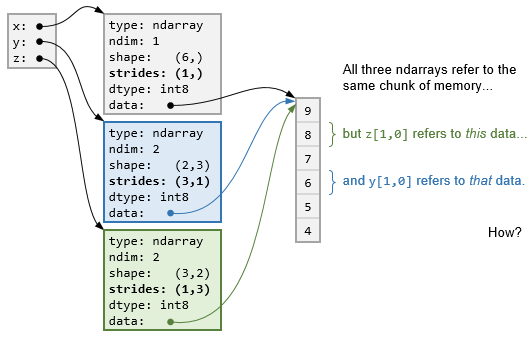<span class="image"></span>

What distinguishes *y* and *z* is not just shape, but also *strides*:




In [ ]:
print(x.strides)
print(y.strides)
print(z.strides)

(1,)
(3, 1)
(1, 3)


For a 2-dimensional ndarray with strides$(n,m)$ always refers to the data
in slot $ni + mj$.

Given 2-dimensional index $\lbrack 1,0\rbrack$, for *y* this refers to
slot index $3(1) + 1(0) = 3$, whereas for *z* this refers
to slot index $1(1) + 3(0) = 1$.

## Further reading

If this document doesn't make things clear for you, here are additional
resources on the internet:

-   [Array programming with
    Numpy](https://www.nature.com/articles/s41586-020-2649-2)
-   [Numpy quickstart
    guide](https://www.numpy.org/devdocs/user/quickstart.html)
-   [Numpy for MATLAB
    users](https://www.numpy.org/devdocs/user/numpy-for-matlab-users.html)
-   [A visual introduction to
    Numpy](https://jalammar.github.io/visual-numpy/)
-   [Python + Numpy + Matplotlib tutorial from Stanford's cs231n
    course](http://cs231n.github.io/python-numpy-tutorial/)